In [1]:
from pyspark import SparkConf, SparkContext

conf = SparkConf().setMaster('local').setAppName('transformations_actions')
sc = SparkContext(conf = conf)

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/06/02 06:33:12 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:
# 스파크 설정 환경 확인
sc.getConf().getAll()

[('spark.master', 'local'),
 ('spark.app.startTime', '1685687592576'),
 ('spark.rdd.compress', 'True'),
 ('spark.serializer.objectStreamReset', '100'),
 ('spark.driver.host', 'ip-172-31-38-79.ap-northeast-3.compute.internal'),
 ('spark.submit.pyFiles', ''),
 ('spark.executor.id', 'driver'),
 ('spark.app.name', 'transformations_actions'),
 ('spark.submit.deployMode', 'client'),
 ('spark.driver.port', '38647'),
 ('spark.ui.showConsoleProgress', 'true'),
 ('spark.app.id', 'local-1685687594299')]

# Python 리스트를 RDD로 만들기

In [3]:
foods = sc.parallelize([
    "짜장면", "마라탕", "짬뽕", "떡볶이", "쌀국수", "짬뽕", "짜장면", "짜장면", "짜장면", "라면", "우동", "라면"
])
foods

ParallelCollectionRDD[0] at readRDDFromFile at PythonRDD.scala:274

1. RDD 내의 모든 데이터 가져오기
- collect()

In [4]:
foods.collect()

['짜장면', '마라탕', '짬뽕', '떡볶이', '쌀국수', '짬뽕', '짜장면', '짜장면', '짜장면', '라면', '우동', '라면']

2. 각 데이터 별 개수 세기
- countByValue()

In [5]:
foods.countByValue()

defaultdict(int,
            {'짜장면': 4,
             '마라탕': 1,
             '짬뽕': 2,
             '떡볶이': 1,
             '쌀국수': 1,
             '라면': 2,
             '우동': 1})

3. 상위 n개의 데이터 가져오기
- take(n)

In [6]:
foods.take(3)

['짜장면', '마라탕', '짬뽕']

4. 처음 1개의 데이터만 가져오기
- first()

In [7]:
foods.first()

'짜장면'

5. RDD내의 데이터 개수 세기

In [8]:
foods.count()

12

6. 중복데이터 제거(Transformations)
- distinct

In [10]:
fd = foods.distinct()
fd

PythonRDD[13] at RDD at PythonRDD.scala:53

In [11]:
fd.collect()

['짜장면', '마라탕', '짬뽕', '떡볶이', '쌀국수', '라면', '우동']

In [12]:
# 중복을 제외한 개수는 distinct 후 count
foods.distinct().count()

7

- 중요한 기능은 아님
- 요소를 하나씩 꺼내서 함수에 저장할 때 사용
- foreach : master한테 리턴이 안됨. worker에서만 볼 수 있고 우리 눈엔 보이지 않음
    - worker마다 log를 남기고 싶을 때 사용할 수 있음
    - terminal에서 log볼 수 있음
    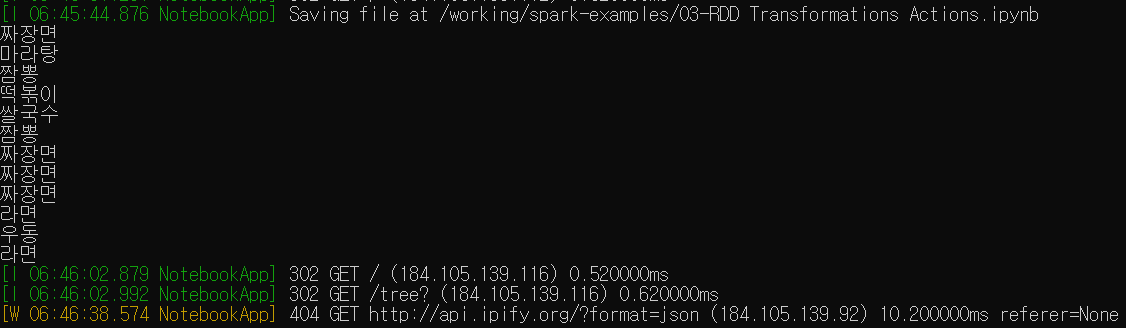

In [14]:
foods.foreach(lambda x : print(x))

짜장면
마라탕
짬뽕
떡볶이
쌀국수
짬뽕
짜장면
짜장면
짜장면
라면
우동
라면


In [16]:
foods.foreach(lambda x : x)

Narrow Transformations
- 1:1 변환을 의미
- 하나의 열을 조작하기 위해 다른 열 및 파티션의 데이터를 사용하지 않는다.
- `filter()`, `map()`, `flatMap()`, `sample()`, `union()`

In [17]:
sample_rdd = sc.parallelize([1,2,3])
sample_rdd

ParallelCollectionRDD[22] at readRDDFromFile at PythonRDD.scala:274

`map(<task>)`

In [19]:
sample_rdd2 = sample_rdd.map(lambda x : x+2)
sample_rdd2

PythonRDD[23] at RDD at PythonRDD.scala:53

In [20]:
sample_rdd2.collect()

[3, 4, 5]

`flatMap(<func>)`
- `map` 함수와 거의 비슷하나, `flatMap` 함수는 `map` 의 모든 결과를 1차원 배열 형식으로 평평하게 나타낸다.

In [22]:
movies = [
    "그린 북",
    "매트릭스",
    "토이 스토리",
    "캐스트 어웨이",
    "포드 V 페라리",
    "보헤미안 랩소디",
    "빽 투 더 퓨처",
    "반지의 제왕",
    "죽은 시인의 사회"
]

In [29]:
moviesRDD = sc.parallelize(movies)
moviesRDD

ParallelCollectionRDD[26] at readRDDFromFile at PythonRDD.scala:274

In [30]:
mapMovies = moviesRDD.map(lambda x: x.split())
mapMovies

PythonRDD[27] at RDD at PythonRDD.scala:53

In [31]:
mapMovies.collect()

[['그린', '북'],
 ['매트릭스'],
 ['토이', '스토리'],
 ['캐스트', '어웨이'],
 ['포드', 'V', '페라리'],
 ['보헤미안', '랩소디'],
 ['빽', '투', '더', '퓨처'],
 ['반지의', '제왕'],
 ['죽은', '시인의', '사회']]

In [32]:
flatMovies = moviesRDD.flatMap(lambda x : x.split()) # 1차원으로 평탄화
flatMovies.collect()

['그린',
 '북',
 '매트릭스',
 '토이',
 '스토리',
 '캐스트',
 '어웨이',
 '포드',
 'V',
 '페라리',
 '보헤미안',
 '랩소디',
 '빽',
 '투',
 '더',
 '퓨처',
 '반지의',
 '제왕',
 '죽은',
 '시인의',
 '사회']

# Wide Transformation

In [33]:
foods = sc.parallelize([
    "짜장면", "마라탕", "짬뽕", "떡볶이", "쌀국수", "짬뽕", "짜장면", "짜장면", "짜장면", "라면", "우동", "라면"
])
foods

ParallelCollectionRDD[29] at readRDDFromFile at PythonRDD.scala:274

`groupBy(<func>)`
- `<func>` : 기준을 마련하는 함수

In [36]:
foodsGroup = foods.groupBy(lambda x : x[0])
foodsGroup.collect()

[('짜', <pyspark.resultiterable.ResultIterable at 0x7f03c10628b0>),
 ('마', <pyspark.resultiterable.ResultIterable at 0x7f03c0fa4160>),
 ('짬', <pyspark.resultiterable.ResultIterable at 0x7f03c1108ca0>),
 ('떡', <pyspark.resultiterable.ResultIterable at 0x7f03c108adf0>),
 ('쌀', <pyspark.resultiterable.ResultIterable at 0x7f03c136a7c0>),
 ('라', <pyspark.resultiterable.ResultIterable at 0x7f03c136a400>),
 ('우', <pyspark.resultiterable.ResultIterable at 0x7f03c1115400>)]

In [37]:
res = foodsGroup.collect()
res

[('짜', <pyspark.resultiterable.ResultIterable at 0x7f03c1249760>),
 ('마', <pyspark.resultiterable.ResultIterable at 0x7f03c1132c10>),
 ('짬', <pyspark.resultiterable.ResultIterable at 0x7f03c1062c10>),
 ('떡', <pyspark.resultiterable.ResultIterable at 0x7f03c12a6640>),
 ('쌀', <pyspark.resultiterable.ResultIterable at 0x7f03c0e7b430>),
 ('라', <pyspark.resultiterable.ResultIterable at 0x7f03c1140160>),
 ('우', <pyspark.resultiterable.ResultIterable at 0x7f03c10e9100>)]

In [41]:
for (k,v) in res:
    print(k, list(v))

짜 ['짜장면', '짜장면', '짜장면', '짜장면']
마 ['마라탕']
짬 ['짬뽕', '짬뽕']
떡 ['떡볶이']
쌀 ['쌀국수']
라 ['라면', '라면']
우 ['우동']


In [42]:
sc.stop()